# Aplicación logística: Teoría del Caos
### Trabajo Práctico Obligatorio - Modelado y Simulación

Damián Alejandro Biaggio (dbiaggio@uade.edu.ar)
Nicolás Alberto Monzón (nimonzon@uade.edu.ar)

Facultad de Ingeniería y Ciencias Exactas - Universidad Argentina De la Empresa.


 Robert May, en ```Simple mathematical models with very complicated dynamics``` propuso una aplicación matemática al estudiar sistemas no lineales en el área de biología, en el cuál se explica como esto podría extrapolarse a otras áreas, como la social o la económica. Mitchell Feigenbaum estudia este modelo, que hoy se conoce como aplicación logística.

 Supongamos que queremos modelar un una población. Partimos de una cantidad $x$ de individuos de la población y proponemos un coeficiente $r$ que represente la tasa combinada entre la mortalidad y la reproducción. Entonces la cantidad de individuos por unidad de tiempo para un instante dado sobre el que se tome ese coeficiente o tasa, podría estar dado por

$$ rx $$

 Por ejemplo, si el individuo estudiado es un conejo, y tenemos que $r = 3$ por unidad de tiempo anual, significaría que el modelo representa que la cantidad de conejos en una población se triplica anualmente.

 Ahora bien, esto significaría que para un año $n$, tenemos $ r^nx $ individuos, y vemos que crece exponencialmente. Entonces, podemos suponer un máximo teórico y tener en cuenta las restricciones del entorno. Se propone entonces agregar un término:

$$ rx(1-x) $$

 Para esto, necesitamos que x sea porcentual y tenga dominio $x \in \left( 0,1 \right)$. Entonces cuando la población va creciendo, el termino $1-x$ tiende a cero, y nos sirve para limitar la población. En general, para cuando llegue el próximo instante de tiempo ($n+1$), sobre el actual ($n$), nos queda:

$$ x_{n+1} = rx_n(1-x_n) $$

### Pero esto también hace que si la población crece mucho en el nuevo termino, el otro lo hago bajar, formando así ciclo retroactivo.

In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import ipywidgets as widgets
def preparar_g(top, r, initial):
    percent = initial/100
    xn=np.arange(-10,10,0.1)
    x0 = r*percent*(1-percent)
    l = [x0]
    for i in range(1,top):
        aux = r*l[i-1]*(1-l[i-1])
        l.append(aux)
    plt.plot(l)
    plt.ylabel('poblacion')
    plt.show()



Vamos a ver varios términos de la sucesión, suponiendo que el comportamiento es anual, $r = 2$ y que nos interesa el comportamiento a largo plazo, para una población que tiene actualmente el 40% de su máximo teórico:

$$x_1 = 2*0.4*(1-0.4) = 0.48$$
$$x_2 = 2*x_1*(1-x_1) = 0.4992$$
$$x_3 = 2*x_2*(1-x_2) = 0.49999872$$
$$x_{25} = 2*x_{24}*(1-x_{24}) \sim 0.5$$


El siguiente ejemplo es el de una población que tiende a mantenerse:

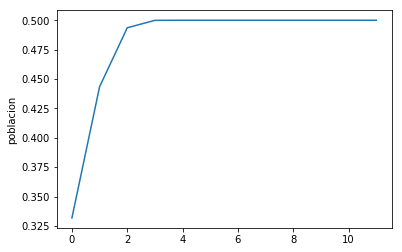

In [17]:
preparar_g(12, 2, 21)

Mientras el siguiente es el de una población que se extingue:

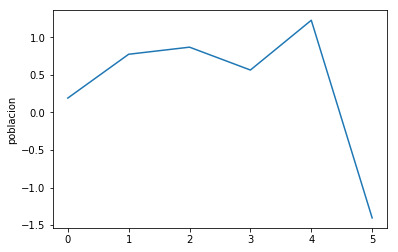

In [18]:
preparar_g(6,5,96)

## Ejemplo Libre

In [19]:
widgets.interact(preparar_g,
                 r=widgets.IntSlider(min=1, max=5, step=1, value=1, description='Tasa de natalidad y mortalidad'),
                 top=widgets.IntSlider(min=4, max=20, step=1, value=1, description='Cantidad de años a analizar'),
                 initial=widgets.IntSlider(min=0, max=100, step=1, value=20, description='Porcentaje inicial de poblacion'))

interactive(children=(IntSlider(value=4, description='Cantidad de años a analizar', max=20, min=4), IntSlider(…

<function __main__.preparar_g(top, r, initial)>

In [36]:
def preparar_f(r):
    xn=np.arange(0,1,0.01)
    xnplus1=r*xn*(1-xn)
    plt.plot(xn,xnplus1)
    plt.show()

widgets.interact(preparar_f,
                 r=widgets.IntSlider(min=1, max=200, step=5, value=1, description='Tasa de natalidad y mortalidad'))

interactive(children=(IntSlider(value=1, description='Tasa de natalidad y mortalidad', max=200, min=1, step=5)…

<function __main__.preparar_f(r)>

Ahora, sea tienda a un valor o que se extinga, esta población tiende a ser constante en algún punto del tiempo. Esto será un punto de equilibrio. Vamos a graficar el punto de equilibrio a traves de la poblacion inicial. Para empezar, vectorizamos y guardamos de 1000 valores de $r$ los ultimos 100 resultados: 

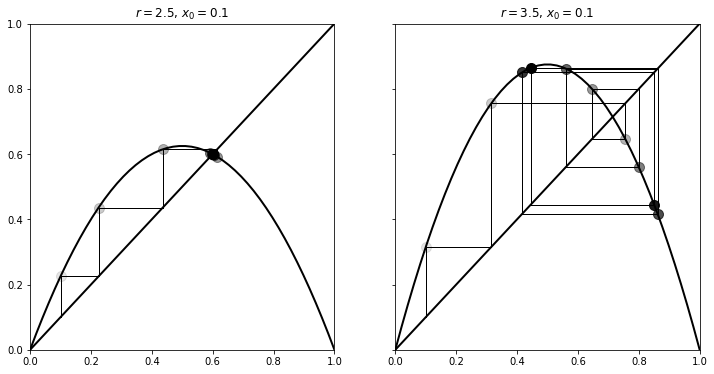

In [21]:
#https://ipython-books.github.io/ Nos da el siguiente ejemplo

def logistic(r, x):
    return r * x * (1 - x)

def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

El primer gráfico es el diagrama de bifurcación. El mismo aparece no solo en sistemas de predador-caza, sino que tambien aparece en otras ramas donde se presentan ecuaciones diferenciales para sistemas no lineales. 

El matemático y físico Mitchell Feigenbaum se dio cuenta que la relación del origen de las bifurcaciones respecto a la anterior era una constante, así fue como se descubrió una nueva constante matemática conocida como la constante de Feigenbaum. Se calcula de la siguiente manera:

$$ \delta = \lim_{n \to \infty}  \frac{a_{n-1} - a_{n-2}}{a_n - a_{n-1}} \approx 4.669201 $$


El segundo, es una grafica del exponente de Lyapunov que nos muestra el grado de separación entre dos trayectorias infinitesimamente cercanas.



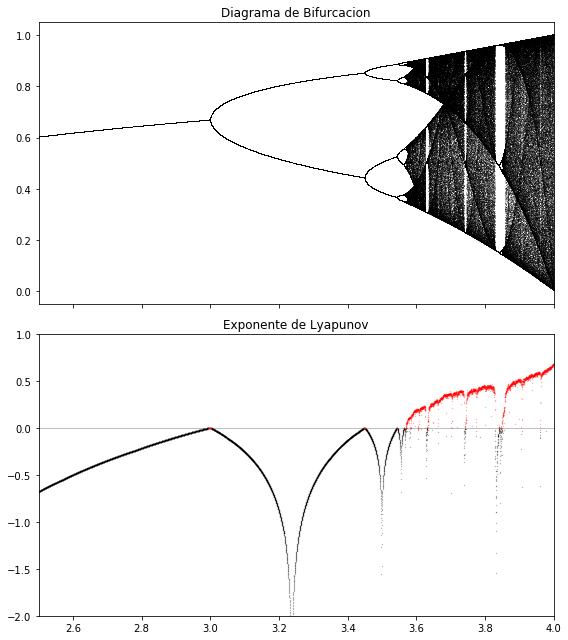

In [22]:
#https://ipython-books.github.io/ Nos da el siguiente ejemplo

n = 10000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100

x = 1e-5 * np.ones(n)
lyapunov = np.zeros(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(2.5, 4)
ax1.set_title("Diagrama de Bifurcacion")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-2, 1)
ax2.set_title("Exponente de Lyapunov")
plt.tight_layout()

El fractal de Mandelbrot es uno de los fractales mas conocidos en matematica. Su grafica es facil de comprender. Tenemos una sucesión como la siguiente:

$$ z_{n+1} = z_n^2 + c $$.

El eje vertical representa el valor de esta constante $c$. En el eje horizontal, el punto se pinta (de blanco en nuestro caso), si existe un $z_k = z_n$ para $k > n$, lo que significaria estar en un bucle.

Por ejemplo, para $c = -1$

$$z_1 = 0^2 -1 = -1$$
$$z_2 = (-1)^2 -1 = 0 $$
$$z_3 = 0^2 - 1 = z_1$$



<Figure size 720x720 with 0 Axes>

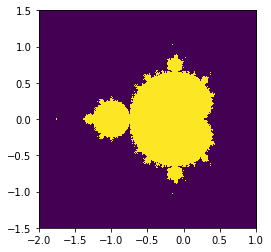

<Figure size 720x720 with 0 Axes>

In [23]:
import warnings

warnings.simplefilter('ignore')

from numpy import newaxis


def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = np.linspace(-2, 1, nx)
    y = np.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.figure(figsize=(10,10)) #Tamaño de la figura
#plt.show()

¿Que tiene que ver este fractal con el diagrama de bifurcación? Que si expandimos esto al espacio complejo, el diagrama de bifurcación es parte de este resultado. Un ejemplo en forma de video se encuentra en el siguiente link:

```https://www.youtube.com/watch?v=8WlGbje7LAo``` 

Es un breve video que muestra este fractal en el diagrama de bifurcación.

El resultado de las bifurcaciones, se vuelve tan caotico, que en un punto dado no es posible diferenciar estos valores obtenidos a los de valores aleatorios. Aca un ejemplo:

En el primer gráfico usamos la ecuación $$x_{n+1} = x_n*r(1-x);  x_0 = 0.02   ;   r = 4  $$

El segundo gráfico usamos datos aleatorios.


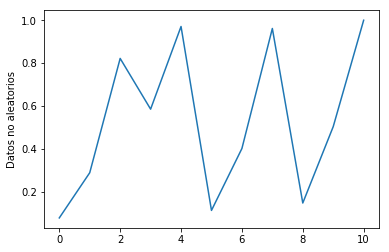

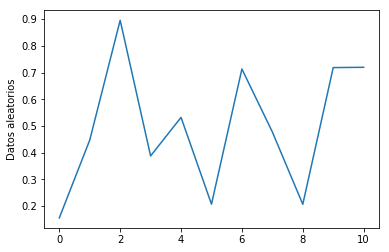

In [24]:
from random import randint, uniform,random

def comparacion():
    percent = 2/100
    xn=np.arange(-10,10,0.1)
    x0 = 4*percent*(1-percent)
    l = [x0]
    for i in range(1,11):
        aux = 4*l[i-1]*(1-l[i-1])
        l.append(aux)
    plt.plot(l)
    plt.ylabel('Datos no aleatorios')
    plt.show()
    
def aleatorio():
    percent = 2/100
    xn=np.arange(-10,10,0.1)
    x0 = random()
    l = [x0]
    for i in range(1,11):
        aux = random()
        l.append(aux)
    plt.plot(l)
    plt.ylabel('Datos aleatorios')
    plt.show()
    
comparacion()
aleatorio()